In [1]:
from math import pow,e
import numpy as np
import numpy_financial as npf
import matplotlib.pyplot as plt

# Time Value Money

def fFgP(p,i,n): #
    i = i/100
    return round((p*pow(1+i,n)),2)

def fFgPl(lst,i): # fFgPl([-15000,10000,5000,0,3000],10) => 398.5
    sum = 0
    for n,amount in enumerate(reversed(lst)):
        sum +=fFgP(amount,i,n)
    return sum

def fFgPcd(p,i,n):
    i = i/100
    return (f*pow(e,(i*n)))

def fFgAcd(f,i,n): # fFgAcd(500,8,5) => 2952.5874266620626
    i = i/100
    return (f*(pow(e,(i*n))-1)/(pow(e,i)-1))

def fPgAcd(a,i,n):
    i = i/100
    return (a*(pow(e,(i*n))-1)/(pow(e,i)-1)/pow(e,i*n))

def fFgAcc(a,i,n): # fFgAcc(500,8,5) => 3073.9043602579395
    i = i/100
    return (a*(pow(e,(i*n))-1)/i) 

def fPgAcc(a,i,n):
    i = i/100
    return (a*(pow(e,(i*n))-1)/i/pow(e,i*n))

def fPgF(f,i,n): # fPgF(14228951.2,18,5) => 6219605.71
    i = i/100
    return round((f*pow(1+i,-n)),2)

def fPgFl(lst,i): # fPgFl([10000,10000,10000,10000],10) => 31698.6
    sum = 0
    for n,amount in enumerate(reversed(lst)): # recheck
        # i is divided in fPgF formula
        sum +=fPgF(amount,i,n+1)
    return sum

def fFgA(a,i,n): # fFgA(5000000,18,5) =>35771048.8
    i = i/100
    return round((a*(pow(1+i,n)-1)/i),2)

def fAgF(f,i,n):
    i = i/100
    return round((f*(i/(pow(1+i,n)-1))),2)

def fPgA(a,i,n):#
    i = i/100
    return round(a*((pow(1+i,n)-1)/(i*pow(1+i,n))),2)

def fAgP(p,i,n):
    i = i/100
    return round((p*((i*pow(1+i,n))/(pow(1+i,n)-1))),2)
    
def fnPAI(amt,i,n):
    a = round(pow(i+1,n),10)
    return round((amt*i*a)+1-a,10)

def fIgPA(p,a,n): # print('ans',fIgPA(1200000,200000,10)) # 10.56
    amt = p/a
    x1,x2 = 0.1,1
    f1 = fnPAI(amt,x1,n)
    f2 = fnPAI(amt,x2,n)
    while True:
        x3 = round(((f2*x1)-(f1*x2))/(f2-f1),10)
        f3 = fnPAI(amt,x3,n)
        if abs(f3)< 0.0001:
            return round(x3*100,3)
        else:
            f1=f2
            x1=x2
            x2=x3
            f2=f3
    

In [2]:
# Discounted Payback period
# here 1st cash flow index[0] is investment
Net_cash_flow = [-10000,2000,3000,4000,5000,6000,7000]
i = 10
def discounted_payback_period(lst,i):
    last = 0
    sum = lst[0]
    for n,amount in enumerate(lst[1:]):
        last = sum
        sum +=round(fPgF(amount,i,n+1),2)
        if sum>0:
            return round(n+(abs(last/fPgF(lst[n+1],i,n+1))),3)
            break
discounted_payback_period(Net_cash_flow,i)

3.79

In [3]:
# IRR
irr = npf.irr([-1000,400,360,320,280,240])
irr*=100
irr

19.999999999999996

In [4]:
# ERR / MIRR (modified irr)
MAAR = 15
E = 16
lst = [-1000,400,360,320,280,240]
err = npf.mirr(lst,MAAR/100,E/100)
err*=100
round(err,2)

17.94

In [5]:
# BC Ratio -> Annual worth
MAAR = 15
TIME = 5
Invest = 1000
Salvage = 100
income = [500,500,500,500,500]
expense = [100,140,180,220,260]

AW_I = fAgP(Invest,MAAR,TIME)
AW_S = fAgF(Salvage,MAAR,TIME)
FW_B = fFgPl(income,MAAR)
AW_B = fAgF(FW_B,MAAR,TIME)
FW_C = fFgPl(expense,MAAR)
AW_C = fAgF(FW_C,MAAR,TIME)

BC = (AW_B-AW_C)/(AW_I-AW_S)
round(BC,4)

1.1679

In [6]:
# Select Alternative (RoR) using IRR
def select_alt_irr(alt,MAAR,Time):
    # IRR
    for alt in Alternatives:
        with_sal = [(-1)*alt[0],*[alt[1]]*Time]
        with_sal[-1]+=alt[2]
        irr = npf.irr(with_sal)
        irr = round(irr*100,1)
        alt.append(irr)

    # check if irr > MAAR
    for alt in Alternatives:
        if MAAR>alt[3]:
            Alternatives.remove(alt)

    # check for best alternative.
    cur = Alternatives[0]
    for alt in Alternatives[1:]:
        inv = alt[0]-cur[0]
        nar = alt[1]-cur[1]
        sal = alt[2]-cur[2]
        with_sal = [(-1)*inv,*[nar]*Time]
        with_sal[-1]+=sal
        irr = round(npf.irr(with_sal)*100,2)
        if irr>MAAR:
            cur = alt
    return ('select project',cur)

Alternatives = [[900,150,0],[1500,276,0],[2500,400,0],[4000,925,0],[5000,1125,0],[7000,1425,0]] # (invest,net annual benefit,salvage) => invest in increasing order.
Time = 10
MAAR = 10

print(select_alt_irr(Alternatives,MAAR,Time))

('select project', [5000, 1125, 0, 18.3])


In [7]:
Alternatives = [[900,150,90],[1500,276,150],[2500,400,250],[4000,925,400],[5000,1125,500],[7000,1425,700]]
Time = 10
MAAR = 10

print(select_alt_irr(Alternatives,MAAR,Time))

('select project', [5000, 1125, 500, 18.8])


In [8]:
# Select Alternative (RoR) using BC ratio
def select_alt_bcr(Alternatives,MAAR,Time):
    # BCr
    for alt in Alternatives:
        AW_I = fAgP(alt[0],MAAR,Time)
        AW_S = fAgF(alt[3],MAAR,Time)
        BC = (alt[1]-alt[2])/(AW_I-AW_S)
        alt.append(round(BC,2))

    # check if BCr > 1
    for alt in Alternatives:
        if alt[4]<1:
            Alternatives.remove(alt)

    # check for best alternative.
    cur = Alternatives[0]
    for alt in Alternatives[1:]:
        inv = alt[0]-cur[0]
        inc = alt[1]-cur[1]
        cost = alt[2]-cur[2]
        sal = alt[3]-cur[3]
        AW_I = fAgP(inv,MAAR,Time)
        AW_S = fAgF(sal,MAAR,Time)
        BC = round((inc-cost)/(AW_I-AW_S),2)
        if BC>1:
            cur = alt
    return ('select project',cur)

Alternatives = [[900,250,100,0],[1500,376,100,0],[2500,500,100,0],[4000,1024,100,0],[5000,1225,100,0],[7000,1525,100,0]] # (invest_in_present,annual_benefit,o&M) => invest in increasing order.
Time = 10
MAAR = 10

print(select_alt_bcr(Alternatives,MAAR,Time))

('select project', [5000, 1225, 100, 0, 1.38])


In [9]:
# Sensitivity Analysis
def sens_anal(Invest,ann_rev,ann_exp,salvage,MAAR,Time):
    all =[[] for x in range(-3,4)]
    for e,i in enumerate(range(-3,4)):
        all[e].append(round(fPgA((ann_rev-ann_exp),MAAR,Time) + fPgF(salvage,MAAR,Time)-(Invest+((.1*i)*Invest))))
        all[e].append(round(fPgA((ann_rev-ann_exp)+((.1*i)*(ann_rev-ann_exp)),MAAR,Time) + fPgF(salvage,MAAR,Time)
        -Invest))
        all[e].append(round(fPgA((ann_rev-ann_exp),MAAR,Time) + fPgF(salvage+((.1*i)*salvage),MAAR,Time)-Invest))
        all[e].append(round(fPgA((ann_rev-ann_exp),MAAR+((.1*i)*MAAR),Time) + fPgF(salvage,MAAR+((.1*i)*MAAR),Time)-Invest))
        all[e].append(round(fPgA((ann_rev-ann_exp),MAAR,Time+((.1*i)*Time)) + fPgF(salvage,MAAR,Time+((.1*i)*Time))-Invest))
    return all

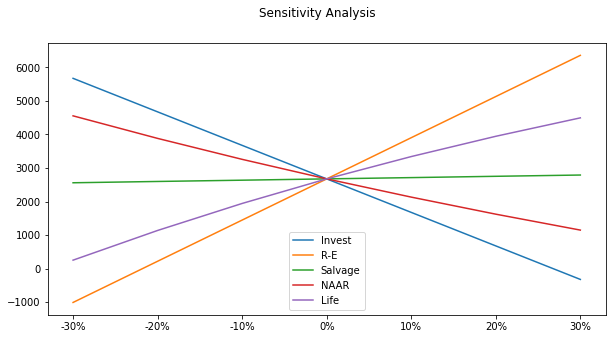

In [10]:
Invest = 10000
ann_rev = 4000
ann_exp = 2000
salvage = 1000
MAAR = 10
Time = 10

table = sens_anal(Invest,ann_rev,ann_exp,salvage,MAAR,Time)
table = np.array(table).transpose().tolist()
label=['Invest','R-E','Salvage','NAAR','Life']
names= ['-30%','-20%','-10%','0%','10%','20%','30%']

fig,ax = plt.subplots(1,1,figsize=(10,5))
for i in range(5):
    ax.plot(names,table[i],label=label[i])
fig.suptitle('Sensitivity Analysis')
ax.legend()
plt.show()

In [11]:
# Breakeven Analysis

# Depreciation


In [44]:
# Double Declining Method
def ddm(Book_val,Salvage,Life):
    R = 2*(1/Life)
    for i in range(1,Life+1):
        DDM = round(R*Book_val,2)
        SLM = round((Book_val-Salvage)/((Life+1)-i),2)
        if DDM>SLM and Book_val-DDM>Salvage:
            Book_val -=DDM
        else:
            Book_val -=SLM
        print('Year:',i,'->',round(Book_val,2))


Book_val = 100000
Salvage = 20000
Life  = 8
ddm(Book_val,Salvage,Life)

Year: 1 -> 75000.0
Year: 2 -> 56250.0
Year: 3 -> 42187.5
Year: 4 -> 31640.62
Year: 5 -> 23730.46
Year: 6 -> 22486.97
Year: 7 -> 21243.48
Year: 8 -> 20000.0


In [49]:
# Sinking Fund Method
def sfm(Book_val,Salvage,MAAR,Life):
    D = fAgF(Book_val-Salvage,MAAR,Life)
    for i in range(Life):
        Dn = fFgP(D,MAAR,i)
        Book_val = round(Book_val-Dn)
        print('Year: ',i+1,Book_val)

Book_val = 7000
Salvage = 2000
Life = 5
MAAR = 10
sfm(Book_val,Salvage,MAAR,Life)

Year:  1 6181
Year:  2 5280
Year:  3 4289
Year:  4 3199
Year:  5 2000


In [61]:
# SOYD
def soyd(Book_val,Salvage,Life):
    sof = sum(range(Life+1))
    dp = Book_val-Salvage

    for i in range(Life):
        Book_val = round(Book_val-(((Life-i)/sof)*dp))
        print(Book_val)

Book_val = 20000
Salvage = 500
Life = 5
soyd(Book_val,Salvage,Life)

13500
8300
4400
1800
500


In [131]:
# MARCS
def marcs(Book_val,Life):
    Rate = 2/Life
    Total_rate = 0
    Final_val=Book_val
    for i in range(Life+1):
        s_life = 0.5
        if i==0:
            Total_rate = round(s_life*Rate*100,4)
            Final_val -=round(s_life*Rate*Book_val,4)
            print('half_year',Final_val,Total_rate)
        else:
            DDM = round(Rate*(100-Total_rate),4)
            SLM = round((100-Total_rate)/(Life+s_life-i),4)
            if DDM>=SLM:
                Final_val = round(Final_val-DDM/100*Book_val,4)
                Total_rate += DDM
                print('ddm',Final_val,DDM)
            else:
                if(i==Life):
                    SLM= SLM/2
                Final_val = round(Final_val-SLM/100*Book_val,4)
                Total_rate += SLM
                print('slm',Final_val,SLM)
    
Book_val = 10000
Life = 5
marcs(Book_val,Life)

half_year 8000.0 20.0
ddm 4800.0 32.0
ddm 2880.0 19.2
ddm 1728.0 11.52
slm 576.0 11.52
slm 0.0 5.76
